## Домашнее задание №5: ДЗ-5

### 1. Знакомство в компании
Представим, что процессы – это компания незнакомых людей, которые знакомятся с помощью следующей игры:<br>
1. Начинает процессор 0. Случайным образом он выбирает другой процессор i и посылает ему сообщение со своим именем (можете случайным образом задавать имя)
2. Процессор i отсылает сообщение случайному процессору j (которые еще не участвовал в игре), в сообщении – все имена и ранги предыдущих процессоров в правильном порядке. Номер процессора j знает только I, так что все должны быть начеку.
3. Игра заканчивается через N ходов. Используйте синхронную пересылку MPI_SSend
Напишите программу используя MPI.<br>

### 2. Параллельный одномерный клеточный автомат.
С помощью MPI распараллельте одномерный клеточный автомат Вольфрама (Rule110).<br>
Игра происходит следующим образом:<br>
1. Инициализируйте одномерный массив 0 и 1 случайным образом
2. В зависимости от значений: левого соседа, себя, правого соседа на следующем шаге клетка либо меняет значение, либо остается той же. Посмотрите, например, что значит <a href='https://en.wikipedia.org/wiki/Rule_110'>Rule110</a><br>
* Сделайте периодические и непериодические граничные условия
* Работает параллельный код на нескольких процессах 
* Имплементированы клетки-призраки (ghost cells) 
* Можно поменять правило игры (сделать одно из 256) 
* График ускорения работы программы от кол-ва процессов
* Картинка эволюции для одного правила

In [1]:
import task1
import task2

### 1. Знакомство в компании
Реализация в файле task1.py.

In [2]:
!chmod +x task1.py

In [3]:
!mpiexec -n 10 ./task1.py

dueryngi_1 say hello to orljkuas_4
caponhxi_0 say hello to dueryngi_1
ctyawjpw_8 say hello to zrfwljev_6
wfqvfaaj_7 say hello to zdttgpbc_2
zrfwljev_6 say hello to wfqvfaaj_7
tfbhggqq_9 say hello to fctullwq_5
orljkuas_4 say hello to ctyawjpw_8
zdttgpbc_2 say hello to tfbhggqq_9
fctullwq_5 say hello to ucpgetix_3

caponhxi_0 dueryngi_1 orljkuas_4 ctyawjpw_8 zrfwljev_6 wfqvfaaj_7 zdttgpbc_2 tfbhggqq_9 fctullwq_5 ucpgetix_3


### 2. Параллельный одномерный клеточный автомат.
Реализация в файле task2.py<br>
Seed зафиксировала для того, чтобы можно было посмотреть на разницу правил и оценить ускорение.<br>
black ▣ = 0<br>
white ▢ = 1

In [4]:
!chmod +x task2.py

#### Rule 110 + periodic

In [5]:
!mpiexec -n 5 ./task2.py --steps 10 --size 60 --rule 110 --periodic --print_pic 

▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣
▢▢▢▢▣▣▣▣▣▢▣▢▢▢▢▢▣▣▣▣▣▢▣▢▢▢▢▢▣▣▣▣▣▢▣▢▢▢▢▢▣▣▣▣▣▢▣▢▢▢▢▢▣▣▣▣▣▢▣▢
▣▣▣▢▣▣▣▣▢▢▢▢▣▣▣▢▣▣▣▣▢▢▢▢▣▣▣▢▣▣▣▣▢▢▢▢▣▣▣▢▣▣▣▣▢▢▢▢▣▣▣▢▣▣▣▣▢▢▢▢
▣▣▢▢▣▣▣▢▢▣▣▢▣▣▢▢▣▣▣▢▢▣▣▢▣▣▢▢▣▣▣▢▢▣▣▢▣▣▢▢▣▣▣▢▢▣▣▢▣▣▢▢▣▣▣▢▢▣▣▢
▣▢▢▢▣▣▢▢▢▣▢▢▣▢▢▢▣▣▢▢▢▣▢▢▣▢▢▢▣▣▢▢▢▣▢▢▣▢▢▢▣▣▢▢▢▣▢▢▣▢▢▢▣▣▢▢▢▣▢▢
▢▢▣▢▣▢▢▣▢▢▢▢▢▢▣▢▣▢▢▣▢▢▢▢▢▢▣▢▣▢▢▣▢▢▢▢▢▢▣▢▣▢▢▣▢▢▢▢▢▢▣▢▣▢▢▣▢▢▢▢
▣▢▢▢▢▢▢▢▢▣▣▣▣▢▢▢▢▢▢▢▢▣▣▣▣▢▢▢▢▢▢▢▢▣▣▣▣▢▢▢▢▢▢▢▢▣▣▣▣▢▢▢▢▢▢▢▢▣▣▣
▢▢▣▣▣▣▣▣▢▣▣▣▢▢▣▣▣▣▣▣▢▣▣▣▢▢▣▣▣▣▣▣▢▣▣▣▢▢▣▣▣▣▣▣▢▣▣▣▢▢▣▣▣▣▣▣▢▣▣▣
▢▢▣▣▣▣▣▢▢▣▣▢▢▢▣▣▣▣▣▢▢▣▣▢▢▢▣▣▣▣▣▢▢▣▣▢▢▢▣▣▣▣▣▢▢▣▣▢▢▢▣▣▣▣▣▢▢▣▣▢
▣▢▣▣▣▣▢▢▢▣▢▢▣▢▣▣▣▣▢▢▢▣▢▢▣▢▣▣▣▣▢▢▢▣▢▢▣▢▣▣▣▣▢▢▢▣▢▢▣▢▣▣▣▣▢▢▢▣▢▢
▢▢▣▣▣▢▢▣▢▢▢▢▢▢▣▣▣▢▢▣▢▢▢▢▢▢▣▣▣▢▢▣▢▢▢▢▢▢▣▣▣▢▢▣▢▢▢▢▢▢▣▣▣▢▢▣▢▢▢▢
World size = 5, time elapsed = 0.023426502011716366


#### Rule 110 + without periodic

In [6]:
!mpiexec -n 5 ./task2.py --steps 10 --size 60 --rule 110 --print_pic 

▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣
▢▢▢▢▣▣▣▣▣▢▣▢▢▢▢▢▣▣▣▣▣▢▣▢▢▢▢▢▣▣▣▣▣▢▣▢▢▢▢▢▣▣▣▣▣▢▣▢▢▢▢▢▣▣▣▣▣▢▣▢
▢▣▣▢▣▣▣▣▢▢▢▢▣▣▣▢▣▣▣▣▢▢▢▢▣▣▣▢▣▣▣▣▢▢▢▢▣▣▣▢▣▣▣▣▢▢▢▢▣▣▣▢▣▣▣▣▢▢▢▢
▢▣▢▢▣▣▣▢▢▣▣▢▣▣▢▢▣▣▣▢▢▣▣▢▣▣▢▢▣▣▣▢▢▣▣▢▣▣▢▢▣▣▣▢▢▣▣▢▣▣▢▢▣▣▣▢▢▣▣▣
▢▢▢▢▣▣▢▢▢▣▢▢▣▢▢▢▣▣▢▢▢▣▢▢▣▢▢▢▣▣▢▢▢▣▢▢▣▢▢▢▣▣▢▢▢▣▢▢▣▢▢▢▣▣▢▢▢▣▣▢
▢▣▣▢▣▢▢▣▢▢▢▢▢▢▣▢▣▢▢▣▢▢▢▢▢▢▣▢▣▢▢▣▢▢▢▢▢▢▣▢▣▢▢▣▢▢▢▢▢▢▣▢▣▢▢▣▢▣▢▢
▢▣▢▢▢▢▢▢▢▣▣▣▣▢▢▢▢▢▢▢▢▣▣▣▣▢▢▢▢▢▢▢▢▣▣▣▣▢▢▢▢▢▢▢▢▣▣▣▣▢▢▢▢▢▢▢▢▢▢▣
▢▢▢▣▣▣▣▣▢▣▣▣▢▢▣▣▣▣▣▣▢▣▣▣▢▢▣▣▣▣▣▣▢▣▣▣▢▢▣▣▣▣▣▣▢▣▣▣▢▢▣▣▣▣▣▣▣▣▢▢
▢▣▢▣▣▣▣▢▢▣▣▢▢▢▣▣▣▣▣▢▢▣▣▢▢▢▣▣▣▣▣▢▢▣▣▢▢▢▣▣▣▣▣▢▢▣▣▢▢▢▣▣▣▣▣▣▣▢▢▣
▢▢▢▣▣▣▢▢▢▣▢▢▣▢▣▣▣▣▢▢▢▣▢▢▣▢▣▣▣▣▢▢▢▣▢▢▣▢▣▣▣▣▢▢▢▣▢▢▣▢▣▣▣▣▣▣▢▢▢▢
▢▣▢▣▣▢▢▣▢▢▢▢▢▢▣▣▣▢▢▣▢▢▢▢▢▢▣▣▣▢▢▣▢▢▢▢▢▢▣▣▣▢▢▣▢▢▢▢▢▢▣▣▣▣▣▢▢▣▣▣
World size = 5, time elapsed = 0.005466368980705738


#### Rule 137

In [7]:
!mpiexec -n 5 ./task2.py --steps 10 --size 60 --rule 137 --periodic --print_pic 

▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣
▢▣▣▢▢▢▢▢▢▣▣▣▢▣▣▢▢▢▢▢▢▣▣▣▢▣▣▢▢▢▢▢▢▣▣▣▢▣▣▢▢▢▢▢▢▣▣▣▢▣▣▢▢▢▢▢▢▣▣▣
▣▣▣▢▢▢▢▢▣▣▢▣▣▣▣▢▢▢▢▢▣▣▢▣▣▣▣▢▢▢▢▢▣▣▢▣▣▣▣▢▢▢▢▢▣▣▢▣▣▣▣▢▢▢▢▢▣▣▢▣
▢▢▣▢▢▢▢▣▣▣▣▣▢▢▣▢▢▢▢▣▣▣▣▣▢▢▣▢▢▢▢▣▣▣▣▣▢▢▣▢▢▢▢▣▣▣▣▣▢▢▣▢▢▢▢▣▣▣▣▣
▢▣▣▢▢▢▣▣▢▢▢▣▢▣▣▢▢▢▣▣▢▢▢▣▢▣▣▢▢▢▣▣▢▢▢▣▢▣▣▢▢▢▣▣▢▢▢▣▢▣▣▢▢▢▣▣▢▢▢▣
▣▣▣▢▢▣▣▣▢▢▣▣▣▣▣▢▢▣▣▣▢▢▣▣▣▣▣▢▢▣▣▣▢▢▣▣▣▣▣▢▢▣▣▣▢▢▣▣▣▣▣▢▢▣▣▣▢▢▣▣
▢▢▣▢▣▣▢▣▢▣▣▢▢▢▣▢▣▣▢▣▢▣▣▢▢▢▣▢▣▣▢▣▢▣▣▢▢▢▣▢▣▣▢▣▢▣▣▢▢▢▣▢▣▣▢▣▢▣▣▢
▢▣▣▣▣▣▣▣▣▣▣▢▢▣▣▣▣▣▣▣▣▣▣▢▢▣▣▣▣▣▣▣▣▣▣▢▢▣▣▣▣▣▣▣▣▣▣▢▢▣▣▣▣▣▣▣▣▣▣▢
▣▣▢▢▢▢▢▢▢▢▣▢▣▣▢▢▢▢▢▢▢▢▣▢▣▣▢▢▢▢▢▢▢▢▣▢▣▣▢▢▢▢▢▢▢▢▣▢▣▣▢▢▢▢▢▢▢▢▣▢
▣▣▢▢▢▢▢▢▢▣▣▣▣▣▢▢▢▢▢▢▢▣▣▣▣▣▢▢▢▢▢▢▢▣▣▣▣▣▢▢▢▢▢▢▢▣▣▣▣▣▢▢▢▢▢▢▢▣▣▣
▢▣▢▢▢▢▢▢▣▣▢▢▢▣▢▢▢▢▢▢▣▣▢▢▢▣▢▢▢▢▢▢▣▣▢▢▢▣▢▢▢▢▢▢▣▣▢▢▢▣▢▢▢▢▢▢▣▣▢▢
World size = 5, time elapsed = 0.025706268963404


#### Rule 118

In [8]:
!mpiexec -n 5 ./task2.py --steps 10 --size 60 --rule 118 --periodic --print_pic 

▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣▢▢▣▢▢▢▢▢▢▢▣▣
▣▢▢▣▣▣▣▣▣▢▢▢▣▢▢▣▣▣▣▣▣▢▢▢▣▢▢▣▣▣▣▣▣▢▢▢▣▢▢▣▣▣▣▣▣▢▢▢▣▢▢▣▣▣▣▣▣▢▢▢
▢▣▢▢▣▣▣▣▢▣▣▢▢▣▢▢▣▣▣▣▢▣▣▢▢▣▢▢▣▣▣▣▢▣▣▢▢▣▢▢▣▣▣▣▢▣▣▢▢▣▢▢▣▣▣▣▢▣▣▢
▢▢▣▢▢▣▣▢▢▢▢▣▢▢▣▢▢▣▣▢▢▢▢▣▢▢▣▢▢▣▣▢▢▢▢▣▢▢▣▢▢▣▣▢▢▢▢▣▢▢▣▢▢▣▣▢▢▢▢▣
▣▢▢▣▢▢▢▣▣▣▢▢▣▢▢▣▢▢▢▣▣▣▢▢▣▢▢▣▢▢▢▣▣▣▢▢▣▢▢▣▢▢▢▣▣▣▢▢▣▢▢▣▢▢▢▣▣▣▢▢
▢▣▢▢▣▣▢▢▣▢▣▢▢▣▢▢▣▣▢▢▣▢▣▢▢▣▢▢▣▣▢▢▣▢▣▢▢▣▢▢▣▣▢▢▣▢▣▢▢▣▢▢▣▣▢▢▣▢▣▢
▢▢▣▢▢▢▣▢▢▢▢▣▢▢▣▢▢▢▣▢▢▢▢▣▢▢▣▢▢▢▣▢▢▢▢▣▢▢▣▢▢▢▣▢▢▢▢▣▢▢▣▢▢▢▣▢▢▢▢▣
▣▢▢▣▣▢▢▣▣▣▢▢▣▢▢▣▣▢▢▣▣▣▢▢▣▢▢▣▣▢▢▣▣▣▢▢▣▢▢▣▣▢▢▣▣▣▢▢▣▢▢▣▣▢▢▣▣▣▢▢
▢▣▢▢▢▣▢▢▣▢▣▢▢▣▢▢▢▣▢▢▣▢▣▢▢▣▢▢▢▣▢▢▣▢▣▢▢▣▢▢▢▣▢▢▣▢▣▢▢▣▢▢▢▣▢▢▣▢▣▢
▢▢▣▣▢▢▣▢▢▢▢▣▢▢▣▣▢▢▣▢▢▢▢▣▢▢▣▣▢▢▣▢▢▢▢▣▢▢▣▣▢▢▣▢▢▢▢▣▢▢▣▣▢▢▣▢▢▢▢▣
▣▢▢▢▣▢▢▣▣▣▢▢▣▢▢▢▣▢▢▣▣▣▢▢▣▢▢▢▣▢▢▣▣▣▢▢▣▢▢▢▣▢▢▣▣▣▢▢▣▢▢▢▣▢▢▣▣▣▢▢
World size = 5, time elapsed = 0.021288624964654446


#### Rule 110 + n=1,...,6

In [9]:
!mpiexec -n 1 ./task2.py --steps 1000 --size 600 --rule 110 --periodic  
!mpiexec -n 2 ./task2.py --steps 1000 --size 600 --rule 110 --periodic  
!mpiexec -n 3 ./task2.py --steps 1000 --size 600 --rule 110 --periodic  
!mpiexec -n 4 ./task2.py --steps 1000 --size 600 --rule 110 --periodic  
!mpiexec -n 5 ./task2.py --steps 1000 --size 600 --rule 110 --periodic 
!mpiexec -n 6 ./task2.py --steps 1000 --size 600 --rule 110 --periodic

World size = 1, time elapsed = 0.3188521349802613
World size = 2, time elapsed = 0.2632347449543886
World size = 3, time elapsed = 0.26406369503820315
World size = 4, time elapsed = 0.28734566300408915
World size = 5, time elapsed = 0.7202114399988204
World size = 6, time elapsed = 1.5471883610007353


Ускорение не прослеживается.

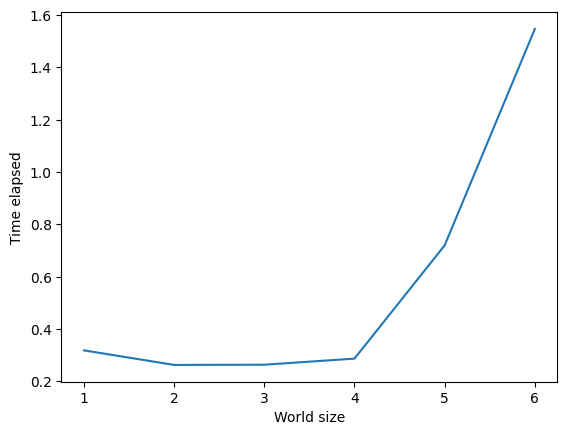

In [11]:
import matplotlib.pyplot as plt
import numpy as np

times = [0.3188521349802613, 0.2632347449543886, 0.26406369503820315, 0.28734566300408915, 0.7202114399988204, 1.5471883610007353]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1,7), times)
plt.ylabel('Time elapsed')
plt.xlabel('World size')
plt.show()